In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

picher_file_path = 'data/picher_stats_2017.csv'
batter_file_path = 'data/batter_stats_2017.csv'

picher = pd.read_csv(picher_file_path)
better =  pd.read_csv(batter_file_path)

picher.columns


Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [60]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


<AxesSubplot:>

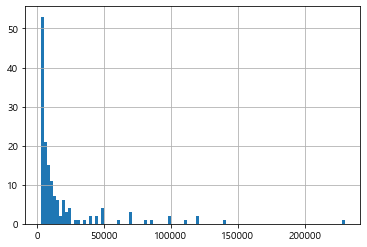

In [61]:
picher['연봉(2018)'].hist(bins= 100)

<AxesSubplot:>

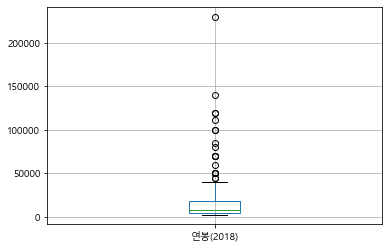

In [62]:

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'

picher.boxplot(column=['연봉(2018)'])

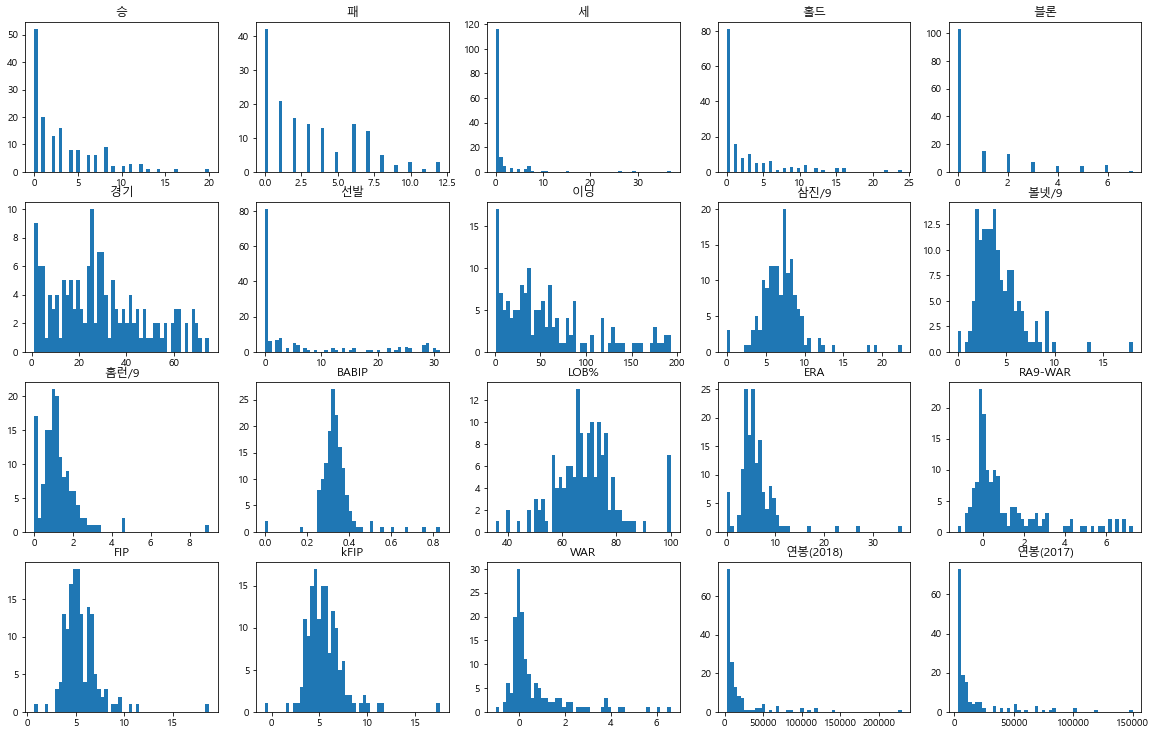

In [63]:
picher_features_df = picher[['승','패','세','홀드','블론','경기','선발','이닝','삼진/9','볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR','연봉(2018)','연봉(2017)']]

def picher_hist_each_column(df):
    plt.figure(figsize=(20,16))
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins = 50)
        ax.set_title(df.columns[i])
    plt.show()
picher_hist_each_column(picher_features_df)

In [64]:
pd.options.mode.chained_assignment = None

def standard_scaling(df,scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x-series_mean)/series_std)
    return df

scale_columns =['승','패','세','홀드','블론','경기','선발','이닝','삼진/9','볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR','연봉(2017)']
picher_df = standard_scaling(picher,scale_columns)
picher_df.rename(columns={"연봉(2018)" : 'y'},inplace=True)
picher_df.head(5)


,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [65]:
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명',axis = 1)
picher_df = picher_df.join(team_encoding)



In [66]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = picher_df[picher_df.columns.difference(['선수명','y'])] 
y = picher_df['y']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)

print(picher_df)

     선수명         승         패         세        홀드        블론        경기  \
0     켈리  3.313623  1.227145 -0.306452 -0.585705 -0.543592  0.059433   
1     소사  2.019505  2.504721 -0.098502 -0.585705 -0.543592  0.059433   
2    양현종  4.348918  0.907751 -0.306452 -0.585705 -0.543592  0.111056   
3    차우찬  1.760682  1.227145 -0.306452 -0.585705 -0.543592 -0.043811   
4    레일리  2.537153  1.227145 -0.306452 -0.585705 -0.543592  0.059433   
..   ...       ...       ...       ...       ...       ...       ...   
147  장민재 -0.309907  0.588357 -0.306452 -0.585705  0.680497  0.214300   
148  정용운 -0.051084 -0.369825 -0.306452 -0.585705 -0.543592 -0.198678   
149  노경은 -0.827554 -0.369825 -0.306452 -0.585705 -0.543592 -1.024633   
150  김승현 -0.827554 -0.050431 -0.306452 -0.364245 -0.543592  0.627278   
151  류희운  0.207740  0.268963 -0.306452 -0.585705 -0.543592 -0.250300   

           선발        이닝      삼진/9  ...  연봉(2017)  KIA  KT  LG  NC  SK  두산  롯데  \
0    2.452068  2.645175  0.672099  ...  2.734705    0 

In [67]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     47.11
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           5.14e-43
Time:                        08:28:45   Log-Likelihood:                -1267.7
No. Observations:                 121   AIC:                             2591.
Df Residuals:                      93   BIC:                             2670.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+04    838.030     20.052      0.000    1.51e+04    1.85e+04
BABIP      -1278.3610   1490.604     -0.858      0.393   -4238.404    1681.682
ERA          -41.4437   2834.935     -0.015      0.988   -5671.062    5588.174
FIP         2.501e+04   1.02e+05      0.245      0.807   -1.78e+05    2.28e+05
KIA         2628.8280   2794.476      0.941      0.349   -2920.447    8178.103
KT          4886.8115   2541.869      1.923      0.058    -160.836    9934.459
LG          3312.8292   2603.168      1.273      0.206   -1856.546    8482.205
LOB%        -150.2946   1954.733     -0.077      0.939   -4032.008    3731.418
NC          1922.6924   3144.811      0.611      0.542   -4322.279    8167.663
RA9-WAR     -733.9182   3677.296     -0.200      0.842   -8036.300    6568.463
SK          2606.5787   2781.818      0.937      0.351   -2917.560    8130.717
WAR         1.185e+04   3150.048      3.761      0.000    5592.994    1.81e+04
kFIP       -2.296e+04   8.69e+04     -0.264      0.792   -1.95e+05     1.5e+05
경기         -2525.3807   3415.415     -0.739      0.462   -9307.719    4256.957
두산         -1847.9942   3319.425     -0.557      0.579   -8439.715    4743.727
롯데           171.1928   2991.209      0.057      0.954   -5768.756    6111.142
볼넷/9         865.4701   6502.041      0.133      0.894    -1.2e+04    1.38e+04
블론           139.3558   1498.117      0.093      0.926   -2835.607    3114.319
삼성           -23.6890   2596.250     -0.009      0.993   -5179.327    5131.948
삼진/9       -3376.4964   8305.085     -0.407      0.685   -1.99e+04    1.31e+04
선발         -5592.6158   5915.457     -0.945      0.347   -1.73e+04    6154.310
세           -134.3455   1497.022     -0.090      0.929   -3107.135    2838.444
승           7136.8706   2594.163      2.751      0.007    1985.378    1.23e+04
연봉(2017)    2.147e+04   1491.142     14.396      0.000    1.85e+04    2.44e+04
이닝           673.9514   7378.595      0.091      0.927    -1.4e+04    1.53e+04
패          -1989.4238   2325.044     -0.856      0.394   -6606.501    2627.653
한화          3146.8396   2884.872      1.091      0.278   -2581.945    8875.625
홀드          -275.2068   1747.739     -0.157      0.875   -3745.871    3195.457
홈런/9       -2215.8740   1.76e+04     -0.126      0.900   -3.72e+04    3.28e+04
==============================================================================
Omnibus:                       29.481   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.748
Skew:                          -0.103   Prob(JB):                     1.00e-69
Kurtosis:                      10.936   Cond. No.                     3.62e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


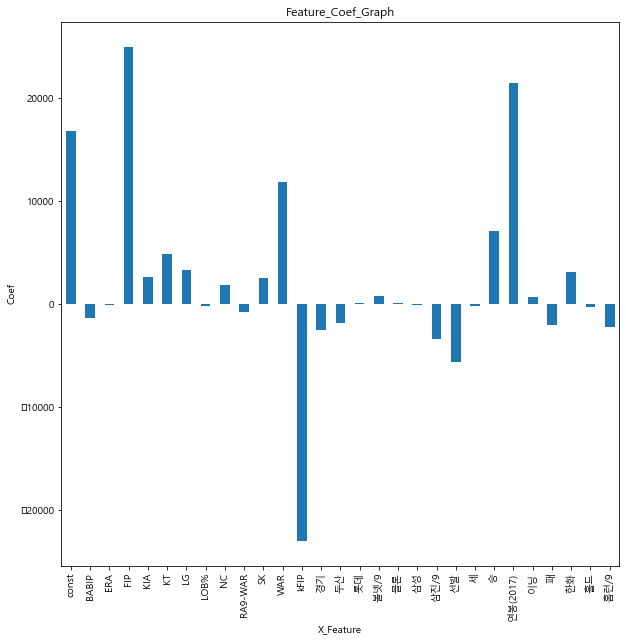

In [68]:
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)
plt.figure(figsize = (10,10))
x_labels = model.params.index.tolist()
ax = coefs_series.plot(kind='bar')
ax.set_title("Feature_Coef_Graph")
ax.set_xlabel("X_Feature")
ax.set_ylabel("Coef")
ax.set_xticklabels(x_labels)

plt.show()
